In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
sns.set()

# Load Data Set

In [3]:
# Load data
df = sns.load_dataset('iris')

# EDA

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


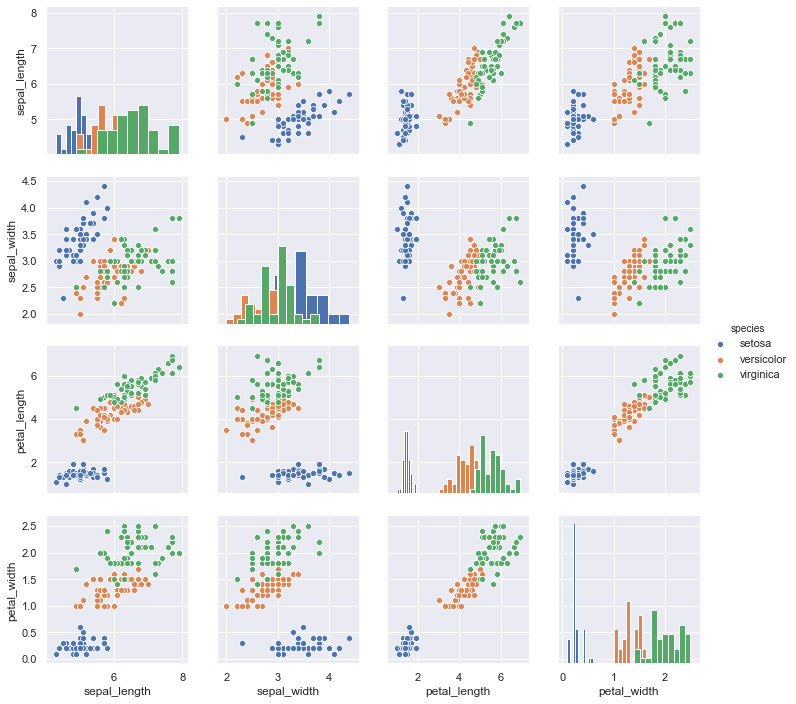

In [7]:
sns.pairplot(df, hue='species', diag_kind='hist')

# Train-Test Split

In [8]:
X = df.drop('species',axis=1)
y= df['species']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Fit and Predict
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) 

In [11]:
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0  8  2]
 [ 0  4 15]]


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.67      0.80      0.73        10
   virginica       0.88      0.79      0.83        19

    accuracy                           0.87        45
   macro avg       0.85      0.86      0.85        45
weighted avg       0.88      0.87      0.87        45



# K-Fold-Validation

In [53]:
from sklearn.model_selection import cross_val_score
neighbors = range(3, 80, 2)
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

Text(0, 0.5, 'Misclassification Error')

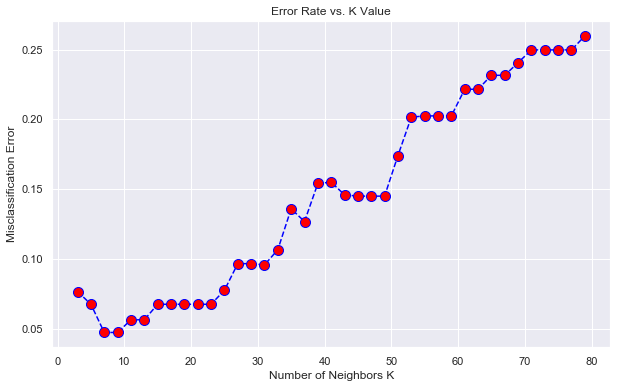

In [55]:
error = [1 - x for x in cv_scores]

plt.figure(figsize=(10,6))
plt.plot(neighbors, error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

In [54]:
optimal_k = neighbors[error.index(min(error))]
print(f"The optimal number of neighbors is {optimal_k}")

The optimal number of neighbors is 3


In [56]:
# NOW WITH K=optimal_k
knn = KNeighborsClassifier(n_neighbors=optimal_k)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(f"WITH K={optimal_k}")
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[11  0  0]
 [ 0 20  0]
 [ 0  1 13]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.95      1.00      0.98        20
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Grid Search

In [58]:
from sklearn.model_selection import GridSearchCV

In [69]:
grid_params = {
    'n_neighbors': range(3, 50, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv=10,
    n_jobs=-1
    )
gs_results = gs.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    3.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
gs_results.best_score_

0.9523809523809523

In [70]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [71]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

In [73]:
best_knn = gs_results.best_estimator_

In [74]:
y_pred = best_knn.predict(X_test)

In [75]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 20  0]
 [ 0  1 13]]


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.95      1.00      0.98        20
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Feature Engneering

In [80]:
X = df.drop('species',axis=1)
y= df['species']
X = X[['petal_length','petal_width']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Fit and Predict
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

